# Project 3 - IMDB Movies

Anjali Prakash


## Load File and Imports

In [65]:
import pandas as pd 
import numpy as np 

In [66]:
# making new folder with os
import os
os.makedirs('Data/',exist_ok=True) # Confirm folder created
os.listdir("Data/")

['title.ratings.tsv',
 'title.akas.tsv',
 'title_basics.csv.gz',
 'title.basics.tsv',
 'title_akas.csv.gz']

In [67]:
basics_url="https://datasets.imdbws.com/title.basics.tsv.gz"
ratings_url = 'https://datasets.imdbws.com/title.ratings.tsv.gz'
akas_url = "https://datasets.imdbws.com/title.akas.tsv.gz"

In [68]:
basics = pd.read_csv(basics_url, sep='\t', low_memory=False)

In [69]:
ratings = pd.read_csv(ratings_url, sep='\t', low_memory=False)

In [70]:
akas = pd.read_csv(akas_url, sep= '\t', low_memory=False)

##  Pre-processing steps

In [73]:
basics.shape

(10100795, 9)

In [74]:
ratings.shape

(1340671, 3)

In [75]:
akas.shape

(36951101, 8)

In [76]:
## elimate regions other than the US
akas_us = akas.loc[akas['region'] == 'US']     

In [77]:
akas_us.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,\N,imdbDisplay,\N,0
36,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
41,tt0000005,6,Blacksmith Scene #1,US,\N,alternative,\N,0


In [78]:
## replace '\n' values with 'NaN'
akas_us = akas_us.replace({'\\N':np.nan})

In [79]:
akas_us.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0


In [81]:
## only keep films that also exist in akas_us table
keepers =basics['tconst'].isin(akas_us['titleId'])
keepers

0            True
1            True
2           False
3           False
4            True
            ...  
10100790    False
10100791    False
10100792    False
10100793    False
10100794    False
Name: tconst, Length: 10100795, dtype: bool

In [82]:
basics = basics[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
...,...,...,...,...,...,...,...,...,...
10100656,tt9916560,tvMovie,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,\N,58,Family
10100685,tt9916620,movie,The Copeland Case,The Copeland Case,0,\N,\N,\N,Drama
10100723,tt9916702,short,Loving London: The Playground,Loving London: The Playground,0,\N,\N,\N,"Drama,Short"
10100746,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019,\N,\N,Short


In [83]:
## replace null values with 'NaN'
basics = basics.replace({'\\N':np.nan})

In [84]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NaN,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,NaN,1,"Short,Sport"


In [85]:
## eliminate null values from runtimeMinutes column
basics = basics[basics['runtimeMinutes'].notna()]

In [87]:
## eliminate null values from genres column
basics = basics[basics['genres'].notna()]

In [89]:
## only keep titles that are 'movies'
basics = basics.loc[basics['titleType'] == 'movie']   

In [91]:
## change startYear to a float dtype
basics['startYear'] = basics['startYear'].astype('float')

In [92]:
basics.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
dtype: object

In [93]:
## only keep films that started between 2000-2021
basics = basics[(basics['startYear'] >=2000)&(basics['startYear'] <2022)]

In [95]:
# Exclude movies that are included in the documentary category.
is_documentary = basics['genres'].str.contains('documentary',case=False)
basics = basics[~is_documentary]

In [97]:
## only include films in ratings table that also exist in 'akas_us' table
keepers =ratings['tconst'].isin(akas_us['titleId'])
keepers

0           True
1           True
2          False
3          False
4           True
           ...  
1340666    False
1340667    False
1340668    False
1340669    False
1340670    False
Name: tconst, Length: 1340671, dtype: bool

In [98]:
ratings = ratings[keepers]
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1990
1,tt0000002,5.8,264
4,tt0000005,6.2,2647
5,tt0000006,5.0,182
6,tt0000007,5.4,829
...,...,...,...
1340632,tt9916200,8.1,233
1340633,tt9916204,8.1,267
1340640,tt9916348,8.3,18
1340641,tt9916362,6.4,5486


In [99]:
ratings = ratings.replace({'\\N':np.nan})

In [100]:
## preview of ratings table
ratings.info

<bound method DataFrame.info of             tconst  averageRating  numVotes
0        tt0000001            5.7      1990
1        tt0000002            5.8       264
4        tt0000005            6.2      2647
5        tt0000006            5.0       182
6        tt0000007            5.4       829
...            ...            ...       ...
1340632  tt9916200            8.1       233
1340633  tt9916204            8.1       267
1340640  tt9916348            8.3        18
1340641  tt9916362            6.4      5486
1340646  tt9916428            3.6        16

[506411 rows x 3 columns]>

In [101]:
## preview of basics table 
basics.info

<bound method DataFrame.info of              tconst titleType  \
34800     tt0035423     movie   
61112     tt0062336     movie   
67486     tt0068865     movie   
67664     tt0069049     movie   
86791     tt0088751     movie   
...             ...       ...   
10099934  tt9914942     movie   
10100328  tt9915872     movie   
10100468  tt9916170     movie   
10100477  tt9916190     movie   
10100561  tt9916362     movie   

                                               primaryTitle  \
34800                                        Kate & Leopold   
61112     The Tango of the Widower and Its Distorting Mi...   
67486                                   Lives of Performers   
67664                            The Other Side of the Wind   
86791                                     The Naked Monster   
...                                                     ...   
10099934                             Life Without Sara Amat   
10100328                               The Last White Witch   
1010

In [102]:
## preview of akas_us table
akas_us.info

<bound method DataFrame.info of             titleId  ordering                                      title  \
5         tt0000001         6                                 Carmencita   
14        tt0000002         7                     The Clown and His Dogs   
33        tt0000005        10                           Blacksmith Scene   
36        tt0000005         1                        Blacksmithing Scene   
41        tt0000005         6                        Blacksmith Scene #1   
...             ...       ...                                        ...   
36950627  tt9916560         1  March of Dimes Presents: Once Upon a Dime   
36950697  tt9916620         1                          The Copeland Case   
36950786  tt9916702         1              Loving London: The Playground   
36950829  tt9916756         1                   Pretty Pretty Black Girl   
36950845  tt9916764         1                                         38   

         region language        types             attri

In [103]:
## Save current dataframe to file.
basics.to_csv("Data/title.basics.csv.gz",compression='gzip',index=False)

In [104]:
# Open saved file and preview again
basics = pd.read_csv("Data/title.basics.csv.gz", low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0068865,movie,Lives of Performers,Lives of Performers,0,2016.0,NaN,90,Drama
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [105]:
## Save current dataframe to file.
ratings.to_csv("Data/title.ratings.csv.gz",compression='gzip',index=False)

In [106]:
# Open saved file and preview again
ratings = pd.read_csv("Data/title.ratings.csv.gz", low_memory = False)
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1990
1,tt0000002,5.8,264
2,tt0000005,6.2,2647
3,tt0000006,5.0,182
4,tt0000007,5.4,829


In [107]:
## Save current dataframe to file.
akas_us.to_csv("Data/title.akas.csv.gz",compression='gzip',index=False)

In [108]:
# Open saved file and preview again
akas_us = pd.read_csv("Data/title.akas.csv.gz", low_memory = False)
akas_us.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


## Part 2

In [1]:
import json
with open('/Users/anjali_work/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [2]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [3]:
def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    # save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
    # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
            
    return info

In [4]:
test = get_movie_with_rating("tt0848228") #put your function name here
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 119.713,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [5]:
## testing our function by looping through a list of ids
import pandas as pd
test_ids = ["tt0848228", "tt0115937","tt0848228","tt0332280"]
results = []
for movie_id in test_ids:
    
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except: 
        pass
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.711,29052,PG-13
1,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.711,29052,PG-13
2,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.881,10537,PG-13


In [6]:
## testing our function by looping through a list of ids
import pandas as pd
test_ids = ["tt0848228", "tt0115937","tt0848228","tt0332280"]
results = []
errors = []
for movie_id in test_ids:
    
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except Exception as e: 
        errors.append([movie_id, e])
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.711,29052,PG-13
1,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.711,29052,PG-13
2,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.881,10537,PG-13


In [7]:
print(f"- Number of errors: {len(errors)}")
errors

- Number of errors: 1


[['tt0115937',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0115937?api_key=cda77e887b98df1e5fb24d109a4ddf54')]]

In [8]:
import os, time,json
import tmdbsimple as tmdb 
from tqdm.notebook import tqdm_notebook 

FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.DS_Store',
 'title.ratings.csv.gz',
 'title.basics.csv.gz',
 '.ipynb_checkpoints',
 'title.akas.csv.gz']

In [14]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)
        

def read_and_fix_json(JSON_FILE):
    """Attempts to read in json file of records and fixes the final character
    to end with a ] if it errors.
    
    Args:
        JSON_FILE (str): filepath of JSON file
        
    Returns:
        DataFrame: the corrected data from the bad json file
    """
    try: 
        previous_df =  pd.read_json(JSON_FILE)
    
    ## If read_json throws an error
    except:
        
        ## manually open the json file
        with open(JSON_FILE,'r+') as f:
            ## Read in the file as a STRING
            bad_json = f.read()
            
            ## if the final character doesn't match first, select the right bracket
            first_char = bad_json[0]
            final_brackets = {'[':']', 
                           "{":"}"}
            ## Select expected final brakcet
            final_char = final_brackets[first_char]
            
            ## if the last character in file doen't match the first char, add it
            if bad_json[-1] != final_char:
                good_json = bad_json[:-1]
                good_json+=final_char
            else:
                raise Exception('ERROR is not due to mismatched final bracket.')
            
            ## Rewind to start of file and write new good_json to disk
            f.seek(0)
            f.write(good_json)
           
        ## Load the json file again now that its fixed
        previous_df =  pd.read_json(JSON_FILE)
        
    return previous_df

In [15]:
# Load in the dataframe from project part 1 as basics:
basics = pd.read_csv('Data/title.basics.csv.gz')

In [16]:
YEARS_TO_GET = [2000,2001]

In [17]:
errors = [ ]

In [18]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)
    
    # If it does not exist: create it
    if file_exists == False:
    # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)
    
    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    
    
    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
      #Get index and movie id from list

       #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            
        except Exception as e:
            errors.append([movie_id, e])
            
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)
    
    print(f"- Total errors: {len(errors)}")
    
    # Instead of previous_df=pd.read_json:
    previous_df = read_and_fix_json(JSON_FILE)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/208 [00:00<?, ?it/s]

- Total errors: 208


Movies from 2001:   0%|          | 0/1580 [00:00<?, ?it/s]

- Total errors: 441


In [28]:
df1 = pd.read_csv('data/final_tmdb_data_2000.csv.gz')
df1.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.10,2298.0,PG


In [29]:
df2 = pd.read_csv('data/final_tmdb_data_2001.csv.gz')
df2.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.330,1217.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.442,130.0,PG-13


In [30]:
# concatenate the data frames
frames = [df1, df2]

df = pd.concat(frames)

In [45]:
df.shape

(2603, 26)

### Exploratory Visualizations

In [40]:
#importing useful packages
import seaborn as sns

**How many movies had at least some valid financial information (values > 0 for budget OR revenue)?**

In [46]:
## only keep films that have a budget or revenue > 0
grossing_titles = df[(df['budget'] >0)|(df['revenue'] >0)]

In [54]:
grossing_titles.shape

(644, 26)

644 movies had some valid financial information (value > 0 for budget or revenue)

**How many movies are there in each of the certification categories (G/PG/PG-13/R)?**

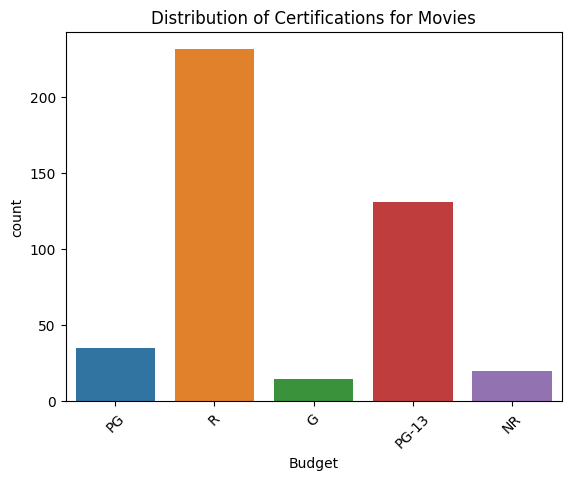

In [55]:
# Histogram for Capital Gain
ax = sns.countplot(data=grossing_titles, x="certification")
#ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Certifications for Movies")
ax.set_xlabel("Budget");

About 40 PG movies, over 200 R movies, ~20 G movies, ~125 PG-13 movies and ~25 NR movies.

**What is the average revenue per certification category?**

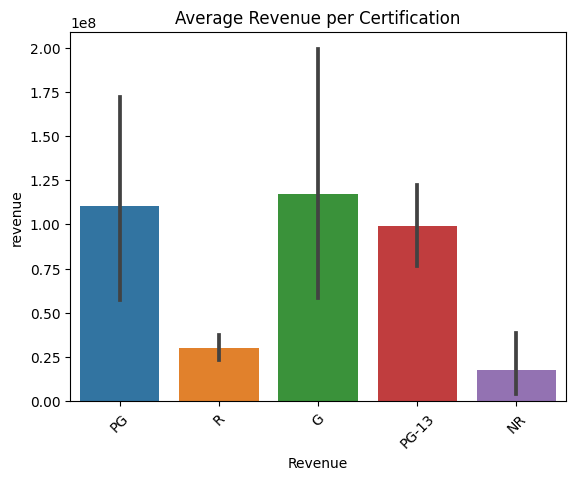

In [56]:
# Histogram for Capital Gain
ax = sns.barplot(data=grossing_titles, x="certification", y = "revenue")
#ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Average Revenue per Certification")
ax.set_xlabel("Revenue");

**What is the average budget per certification category?**

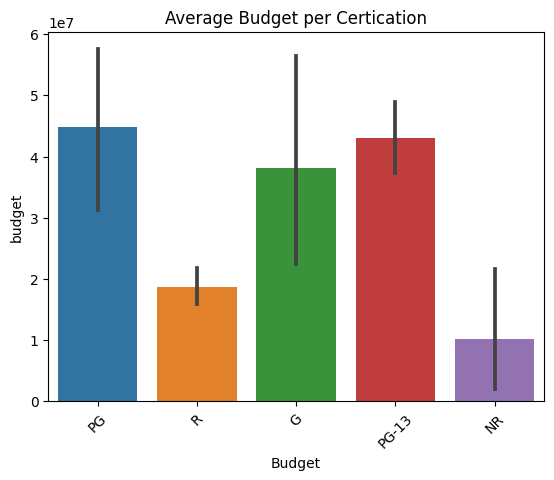

In [58]:
# Histogram for Capital Gain
ax = sns.barplot(data=grossing_titles, x="certification", y = "budget")
#ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Average Budget per Certication")
ax.set_xlabel("Budget");

In [61]:
df.to_csv(f"tmdb_results_combined.csv.gz", compression="gzip", index=False)